# Exploratory Data Analysis - Terrorism

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("globalterrorismdb_0718dist.csv" ,encoding='ISO-8859-1',low_memory=False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.shape

(181691, 135)

In [6]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
missing_values = (df.isnull().sum()).sum()
missing_values

13853997

In [8]:
total_cells = df.size
total_cells

24528285

In [9]:
(missing_values/total_cells)*100

56.481718962414206

Thus 56% of values are missing

In [10]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [11]:
df = df[['iyear','imonth','iday','country_txt','region_txt','provstate','city','success',
          'attacktype1_txt','targtype1_txt','target1','nkill','nwound','summary','gname','weaptype1_txt','motive']]

In [12]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,success,attacktype1_txt,targtype1_txt,target1,nkill,nwound,summary,gname,weaptype1_txt,motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,Assassination,Private Citizens & Property,Julio Guzman,1.0,0.0,NaN,MANO-D,Unknown,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,Assassination,Journalists & Media,Employee,1.0,0.0,NaN,Unknown,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,1,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,NaN,NaN,NaN,Unknown,Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,1,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,NaN,NaN,NaN,Unknown,Incendiary,NaN


In [13]:
df.shape

(181691, 17)

We extracted only the necessary columns

In [14]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                   'city':'City','success':'Success','region_txt':'Region','attacktype1_txt':'Attacktype',
                   'target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [16]:
df.describe()

,Year,Month,Day,Success,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,0.889598,2.403272,3.167668
std,13.259430,3.388303,8.814045,0.313391,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,1.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,1.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,1.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1570.000000,8191.000000


In [17]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
State             421
City              434
Success             0
Attacktype          0
Target_type         0
Target            636
Killed          10313
Wounded         16311
Summary         66129
Group               0
Weapon_type         0
Motive         131130
dtype: int64

In [19]:
df['State'] = df['State'].fillna('Unknown')
df['City'] = df['City'].fillna('Unknown')
med_wounded=df['Wounded'].median()
med_killed=df['Killed'].median()
df['Wounded'] = df['Wounded'].fillna(med_wounded).astype(int)
df['Killed'] = df['Killed'].fillna(med_killed).astype(int)

In [22]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
State               0
City                0
Success             0
Attacktype          0
Target_type         0
Target            636
Killed              0
Wounded             0
Summary         66129
Group               0
Weapon_type         0
Motive         131130
dtype: int64

In [23]:
df=df.drop(['Motive','Target','Summary'],axis=1)

In [24]:
df.isnull().sum().any()

False

<function matplotlib.pyplot.show(close=None, block=None)>

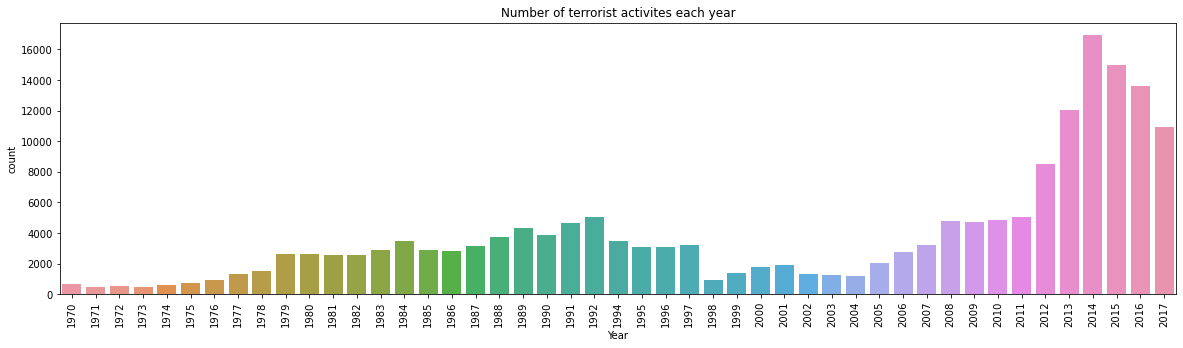

In [25]:
plt.figure(figsize = (20,5))
sns.countplot(x='Year',data=df)
plt.xticks(rotation=90)
plt.title('Number of terrorist activites each year')
plt.show

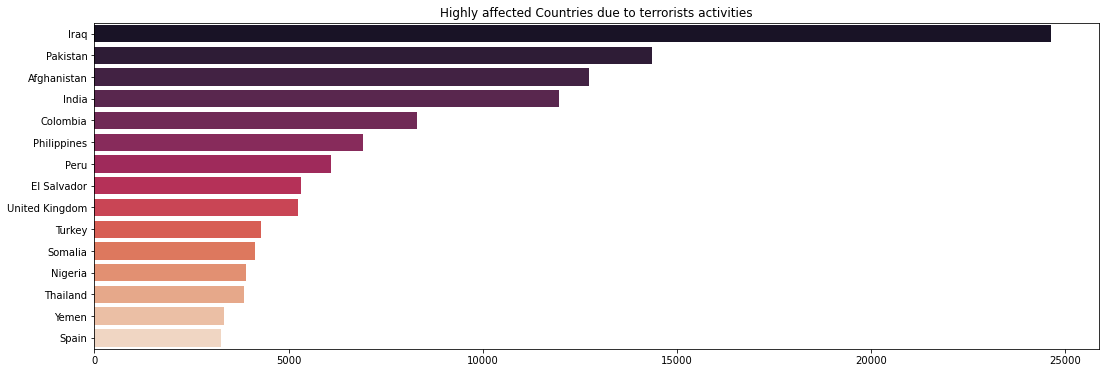

In [26]:
plt.figure(figsize=(18,6))
sns.barplot(y=df['Country'].value_counts()[:15].index,x=df['Country'].value_counts()[:15].values,palette='rocket')
plt.title('Highly affected Countries due to terrorists activities')
plt.show()   

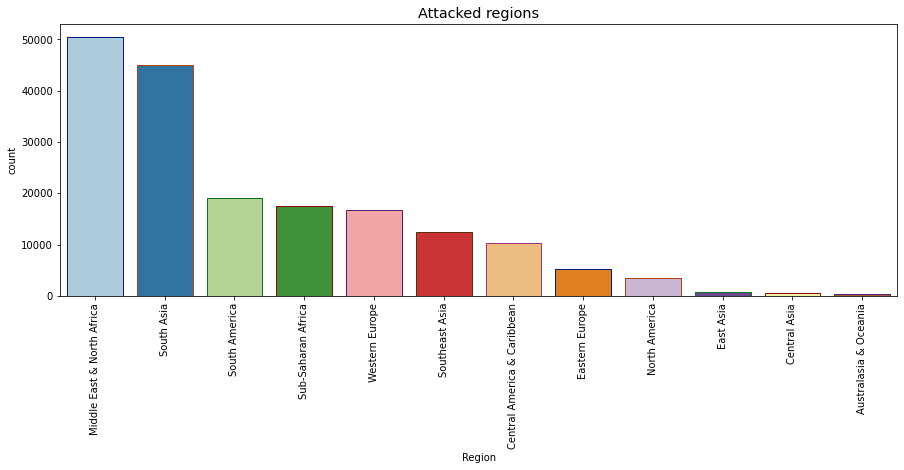

In [27]:
plt.figure(figsize = (15,5))
sns.countplot(x='Region',data=df,palette='Paired',edgecolor=sns.color_palette('dark',7),
              order=df['Region'].value_counts().index)
plt.rcParams.update({'font.size':12});
plt.xticks(rotation=90)
plt.title('Attacked regions')
plt.show()

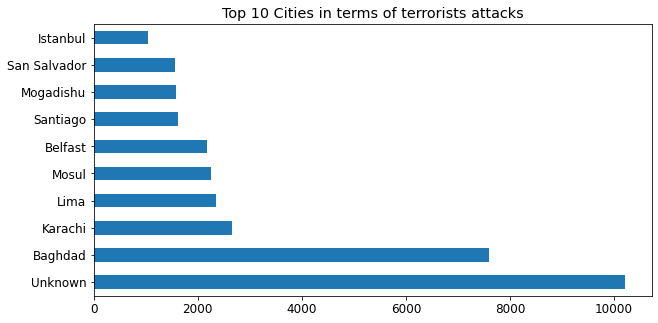

In [28]:
df['City'].value_counts().head(10).plot(kind='barh',figsize=[10,5])
plt.title('Top 10 Cities in terms of terrorists attacks')
plt.show() 

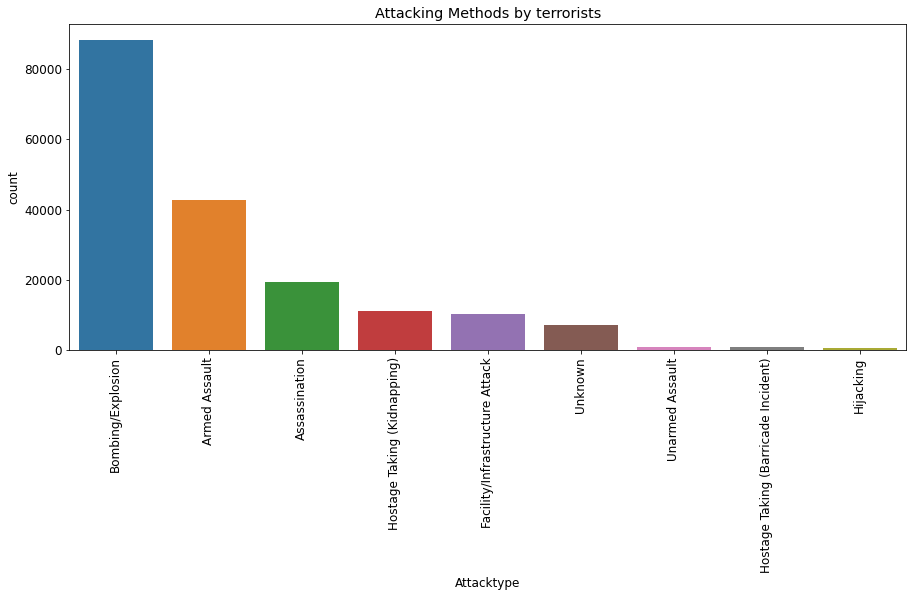

In [29]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Attacktype',data=df,order=df['Attacktype'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by terrorists')
plt.show()

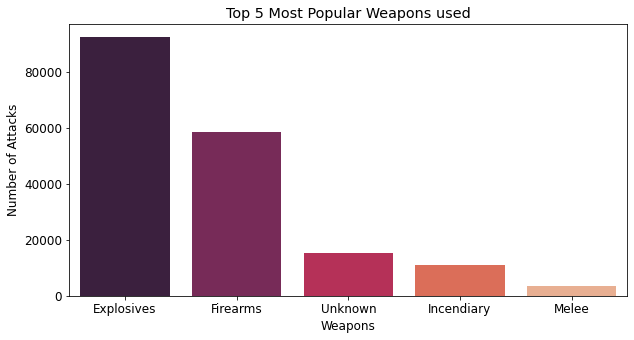

In [30]:
plt.figure(figsize = (10,5))
sns.barplot(x=df.Weapon_type.value_counts().head(5).index,y=df.Weapon_type.value_counts().head(5).values,
            palette='rocket')
plt.title('Top 5 Most Popular Weapons used')
plt.xlabel('Weapons')
plt.ylabel('Number of Attacks')
plt.show()

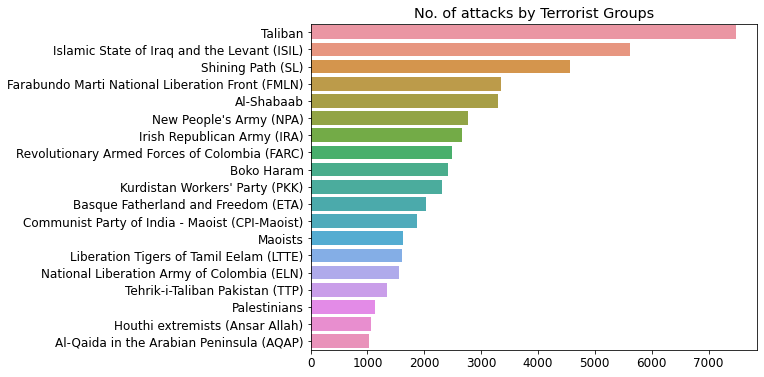

In [31]:
sns.barplot(x=df['Group'].value_counts()[1:20].values,y=df['Group'].value_counts()[1:20].index)
fig=plt.gcf()
plt.title('No. of attacks by Terrorist Groups')
fig.set_size_inches(8,6)
plt.show()

Text(0.5, 1.0, 'Successfull terrorist operations')

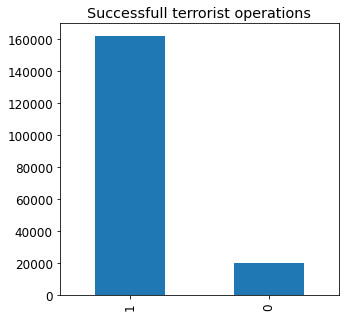

In [32]:
df['Success'].value_counts().plot(kind='bar',figsize=[5,5])
plt.title("Successfull terrorist operations")

1. Middle East & North Africa were the top affected region. Most number of people are wounded and/or killed here.
2. The country that was most affected by terror attacks was Iraq. Iraq had the most number of people wounded and/or killed.
3. The State & the City that was most affected by terror attacks was Baghdad.
4. Year 2014 had the most number of terror attacks in the last decade! Approximately 17000 attacks in one year. This means that around 47 attacks were happening every single day during that year in multiple locations around the world!
5. Bombing/Explosion has been consistently the most popular method of attack over the course of the last 5 decades
6. Explosives have been consistently the most popular weapon of choice for terrorists.
7. Taliban has gained much prominence since 2012 and is now responsible for most number of terror attacks.
8. Hot zone of terrorist according to State - Northern ireland, Country - Iraq, Region - Middle east and North Africa, City - Baghdad